In [6]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [7]:
from scipy.stats import uniform

In [8]:
data = uniform.rvs(size=10000)

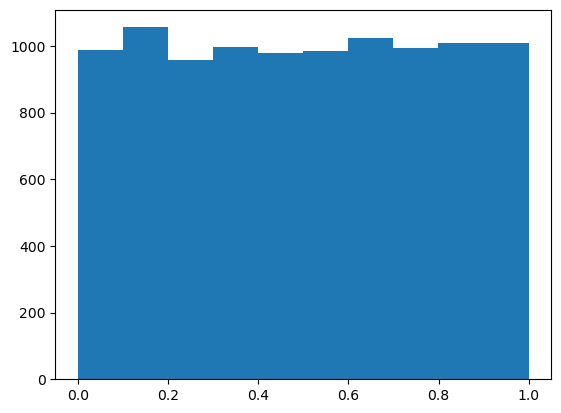

In [10]:
plt.hist(data)
plt.show()

# Normal Distribution

In [11]:
from scipy.stats import norm

In [12]:
data = norm.rvs(size=10000)

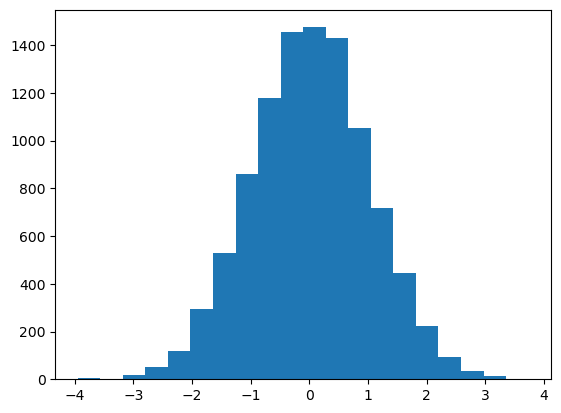

In [13]:
plt.hist(data,bins=20)
plt.show()

bernoulli = discrete probability

In [15]:
from scipy.stats import bernoulli
data = bernoulli.rvs(0.5,size=10000)

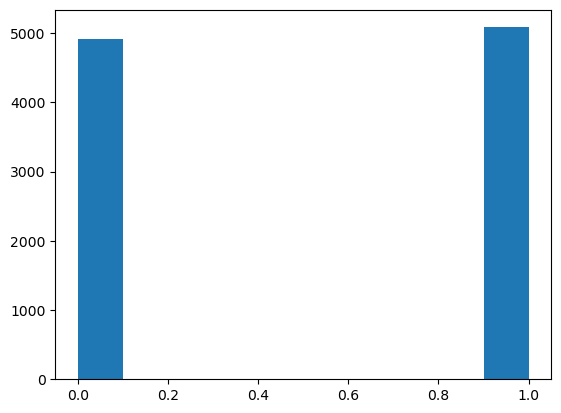

In [17]:
plt.hist(data);

In [18]:
from scipy.stats import gamma
data = gamma.rvs(a=1,size=10000)

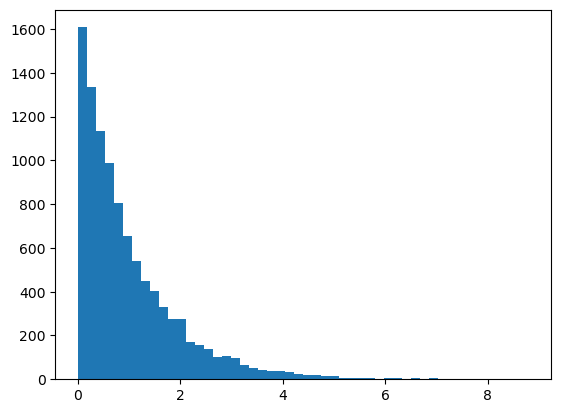

In [20]:
plt.hist(data,50);

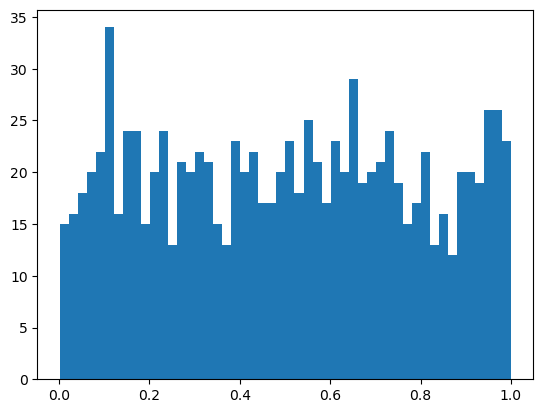

In [22]:
from scipy.stats import beta
data = beta.rvs(1,1,size=1000)
plt.hist(data,50);

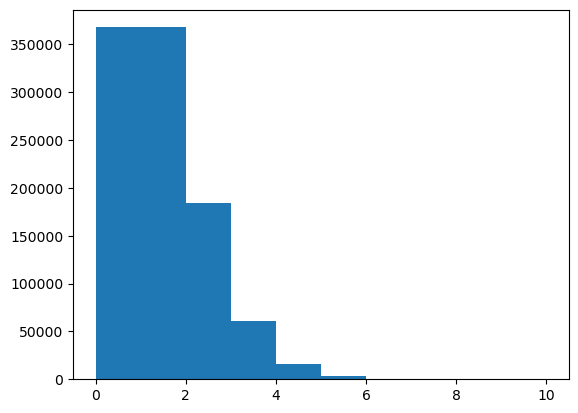

In [23]:
from scipy.stats import poisson
data = poisson.rvs(mu=1,size=1000000)
plt.hist(data);

# Testing Distributions

In [24]:
import scipy.stats as stats
from scipy.stats import normaltest

In [25]:
def check_p_val(p_val,alpha):
    if p_val < alpha:
        print('We have evidence to reject the null hypothesis.')
    else:
        print('We do not have evidence to reject the null hypothesis.')

In [26]:
d1 = stats.norm.rvs(size=1000000)

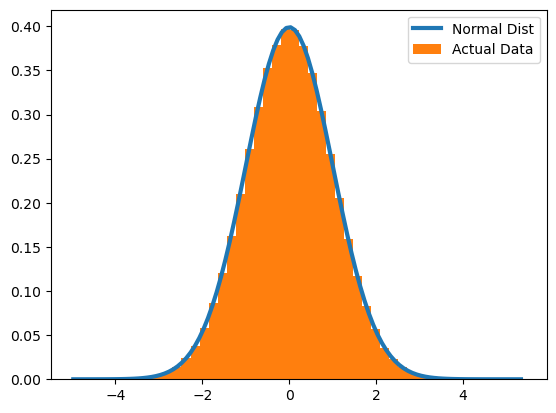

In [31]:
xs = np.arange(d1.min(),d1.max(),0.1)
fit = stats.norm.pdf(xs,np.mean(d1),np.std(d1))
plt.plot(xs,fit,label='Normal Dist',lw=3)
plt.hist(d1,50,density=True,label='Actual Data');
plt.legend();

In [32]:
normaltest?

In [33]:
stat,p_val = normaltest(d1)

In [35]:
print('\nNormaltest p-value is: {:1.2f} \n'.format(p_val))

check_p_val(p_val,alpha=0.05)


Normaltest p-value is: 0.81 

We do not have evidence to reject the null hypothesis.


In [36]:
d2 = stats.beta.rvs(7,10,size=1000000)

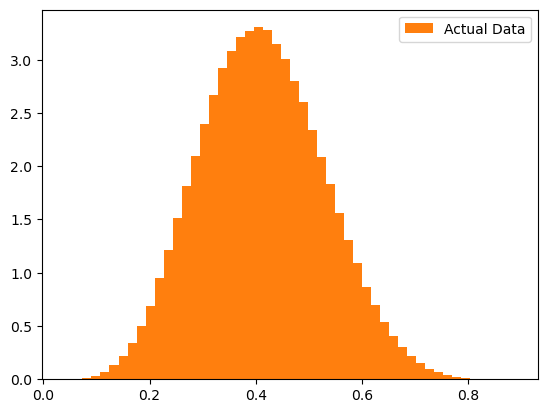

In [37]:
plt.hist(d2,50,density=True,color='C1',label='Actual Data');
plt.legend();

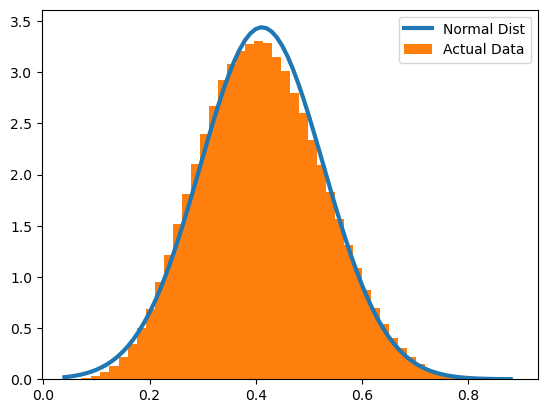

In [38]:
xs = np.arange(d2.min(),d2.max(),0.01)
fit = stats.norm.pdf(xs,np.mean(d2),np.std(d2))
plt.plot(xs,fit,label='Normal Dist',lw=3)
plt.hist(d2,50,density=True,label='Actual Data');
plt.legend();

In [39]:
stat,p_val = normaltest(d2)

In [40]:
# Check the p-value of the normaltest
print('\nNormaltest p-value is: {:1.2e} \n'.format(p_val))

# With alpha value of 0.05, how should we proceed
check_p_val(p_val, alpha=0.05)


Normaltest p-value is: 0.00e+00 

We have evidence to reject the null hypothesis.


In [41]:
from scipy.stats import kstest

In [42]:
# Let's continue using our data from above, from the beta distribution. 
#   We can confirm kstest considers it not normally distributed  
stat, p_val = kstest(d2, 'norm')
print('Statistic: \t{:1.2f} \nP-Value: \t{:1.2e}\n'.format(stat, p_val))
check_p_val(p_val, alpha=0.05)

Statistic: 	0.56 
P-Value: 	0.00e+00

We have evidence to reject the null hypothesis.


In [43]:
# Now compare the data to the beta distribution.
#   Note that in this case, we have to specify some parameters for the beta 
#   distribution we are testing against, so we will use the simulation parameters
stat, p_val = kstest(d2, 'beta', [7, 10])
print('Statistic: \t{:1.2f} \nP-Value: \t{:1.2e}\n'.format(stat, p_val))
check_p_val(p_val, alpha=0.05)

Statistic: 	0.00 
P-Value: 	9.19e-02

We do not have evidence to reject the null hypothesis.
